In [1]:
import numpy as np
from numpy.random import normal

np.random.seed(37)

N = 500

x0 = normal(0, 1, N)
x1 = normal(1 + 2 * x0, 1, N)

X0 = np.hstack([
        x0.reshape(-1, 1), 
        x1.reshape(-1, 1)
    ])

x0 = normal(1, 1, N)
x1 = normal(1 + 2 * x0, 1, N)

X1 = np.hstack([
        x0.reshape(-1, 1), 
        x1.reshape(-1, 1)
    ])

X = np.vstack([X0, X1])
y = np.hstack([np.full((1, X0.shape[0]), 0), np.full((1, X1.shape[0]), 1)])[0]

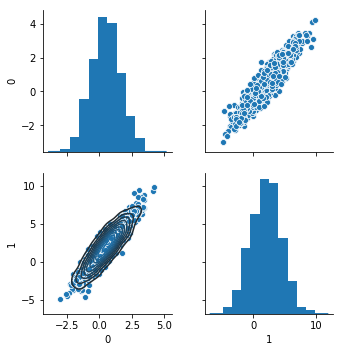

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

g = sns.pairplot(pd.DataFrame(X))
g.map_lower(sns.kdeplot, **{'shade': False, 'n_levels': 10})
g.map_upper(sns.scatterplot)
g.map_diag(sns.distplot, **{'hist': False, 'rug': False, 'kde': True})

In [3]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=20)
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [4]:
import shap

shap.initjs()

D = pd.DataFrame(X, columns=['X{}'.format(i) for i in range(X.shape[1])])
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(D)

In [5]:
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], D.iloc[0,:])

In [6]:
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], D.iloc[0,:])

In [7]:
shap.force_plot(explainer.expected_value[0], shap_values[0], X)

In [8]:
shap.force_plot(explainer.expected_value[1], shap_values[1], X)

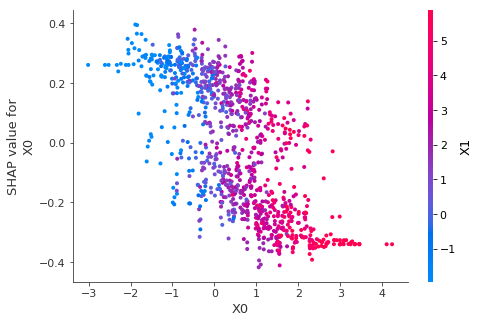

In [9]:
shap.dependence_plot('X0', shap_values[0], D)

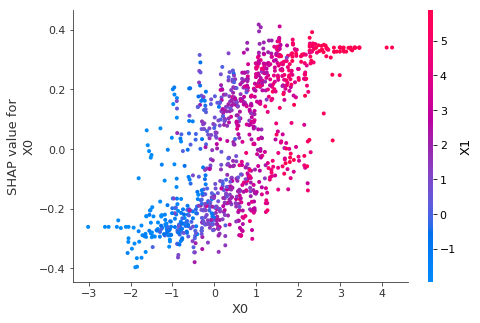

In [10]:
shap.dependence_plot('X0', shap_values[1], D)

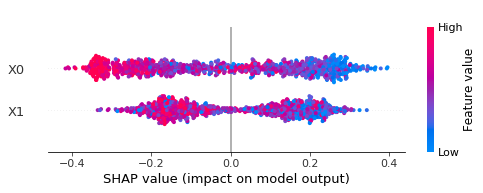

In [11]:
shap.summary_plot(shap_values[0], D)

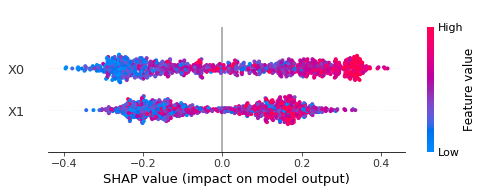

In [12]:
shap.summary_plot(shap_values[1], D)

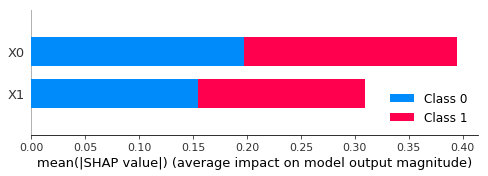

In [13]:
shap.summary_plot(shap_values, D)